In [1]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from pandas_datareader import data
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm
import pyfolio as pf
%matplotlib inline

C:\Users\LAVANYA MARAN\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
import csv
df = pd.read_csv('Final_stock_data_V2.csv')
df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,109.188247,12.97,0.171149,0.355467,0.049267
1,ABT,Abbott Laboratories,Healthcare,Increase,Above Fair Price,OverValued,Average,118.2900,0.181179,2.091710e+11,...,0.74,3.940,0.1318,22.924420,30.022842,51.234756,25.96,0.109154,0.249769,0.247649
2,ACN,Accenture plc,Technology,Increase,Above Fair Price,OverValued,Sustainable,323.9050,0.208836,2.047083e+11,...,1.21,9.613,0.1135,31.025385,33.694477,121.148794,9.45,0.166287,0.254874,0.245322
3,ADM,Archer-Daniels-Midland Company,Consumer Defensive,Increase,Above Fair Price,OverValued,Not Sustainable,76.9850,0.122815,4.327843e+10,...,0.81,4.790,0.0660,14.804809,16.072025,19.449588,36.42,0.117663,0.252289,0.150693
4,ADP,"Automatic Data Processing, Inc.",Industrials,Increase,Above Fair Price,OverValued,Sustainable,201.0100,0.182708,8.443324e+10,...,0.83,6.460,0.1371,26.483530,31.116098,90.801919,14.18,0.120094,0.272415,0.178939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,XRX,Xerox Holdings Corporation,Technology,Increase,Above Fair Price,UnderValued,No Data,20.6059,0.029031,3.678401e+09,...,1.75,1.459,-0.1600,10.302950,14.123303,0.609810,999.00,0.231929,0.405374,-0.032851
934,ZD,"Ziff Davis, Inc.",Communication Services,Increase,Above Fair Price,OverValued,No Data,102.4800,0.145864,4.941668e+09,...,1.01,4.120,0.1140,14.193907,24.873789,38.485339,999.00,0.141975,0.308007,0.055993
935,ZUMZ,Zumiez Inc.,Consumer Cyclical,Decrease,Above Fair Price,UnderValued,No Data,42.6600,0.035214,9.777245e+08,...,1.68,4.870,0.1500,9.233767,8.759754,21.330001,999.00,0.223419,0.513665,0.157523
936,ESNT,Essent Group Ltd.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,44.4800,0.082041,4.912015e+09,...,1.33,5.569,0.1555,7.339934,7.987071,23.215807,999.00,0.180874,0.502764,0.045034


<AxesSubplot:>

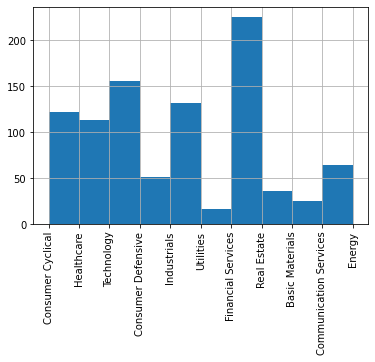

In [3]:
df['sector'].hist(xrot=90)

## Filter based on 2/3 criteria

In [4]:
def check_criteria(each):
    check = []
    if each["capm_status"] == "UnderValued":
        check.append(True)
    if each["Earnings_expectation"] == "Increase":
        check.append(True)
    if each["irv_status"] == "Below Fair Price":
        check.append(True)
    return check

In [5]:
def check_number(criteria):
    if len(criteria) >= 2:
        return True
    else:
        return False

In [6]:
rows = []
for i in range(938):
    each = df.iloc[i]
    criteria = check_criteria(each)
    result = check_number(criteria)
    if result:
        rows.append(i)

In [7]:
len(rows)

476

In [8]:
df = df.iloc[rows]
df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,109.188247,12.97,0.171149,0.355467,0.049267
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,1.43,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161
11,ALK,"Alaska Air Group, Inc.",Industrials,Increase,Above Fair Price,UnderValued,No Data,58.9750,0.141697,7.425660e+09,...,1.55,3.770,-0.2340,9.073076,15.643236,0.761055,999.00,0.207617,0.454054,-0.086043
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,1.14,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,1.95,3.242,0.3532,35.062874,36.122765,253.245268,999.00,0.256240,0.564107,0.569607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,XOMA,XOMA Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,20.7600,-0.034853,2.348205e+08,...,0.81,0.082,0.1900,-90.260870,253.170730,14.120154,999.00,0.117663,0.689078,0.371572
932,XP,XP Inc.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,34.1100,-0.001020,1.908622e+10,...,1.91,0.986,0.0478,27.508064,34.594322,7.380346,999.00,0.251378,NaN,NaN
933,XRX,Xerox Holdings Corporation,Technology,Increase,Above Fair Price,UnderValued,No Data,20.6059,0.029031,3.678401e+09,...,1.75,1.459,-0.1600,10.302950,14.123303,0.609810,999.00,0.231929,0.405374,-0.032851
936,ESNT,Essent Group Ltd.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,44.4800,0.082041,4.912015e+09,...,1.33,5.569,0.1555,7.339934,7.987071,23.215807,999.00,0.180874,0.502764,0.045034


In [9]:
#total number of stocks for each sector 

df["sector"].value_counts()

Industrials               93
Technology                89
Consumer Cyclical         79
Financial Services        68
Healthcare                52
Communication Services    29
Basic Materials           20
Consumer Defensive        19
Energy                    15
Real Estate               11
Utilities                  1
Name: sector, dtype: int64

In [10]:
#df for each sector

df_basic_materials = df.loc[df['sector'] == 'Basic Materials']
df_communication = df.loc[df['sector'] == 'Communication Services']
df_consumer_c = df.loc[df['sector'] == 'Consumer Cyclical']
df_consumer_d = df.loc[df['sector'] == 'Consumer Defensive']
df_energy = df.loc[df['sector'] == 'Energy']
df_financial = df.loc[df['sector'] == 'Financial Services']
df_healthcare = df.loc[df['sector'] == 'Healthcare']
df_industrials = df.loc[df['sector'] == 'Industrials']
df_real_estate = df.loc[df['sector'] == 'Real Estate']
df_tech = df.loc[df['sector'] == 'Technology']
df_utilites = df.loc[df['sector'] == 'Utilities']

In [11]:
#sectors used in income model: utilities, real estate, financial, consumer defensive, industrials

In [12]:
#utilities only got 1 stock so use that

# Real Estate Sector

## Filtering Stocks based on Sharpe Ratio

In [13]:
def get_closeprice(ticker):    
    start_date = str(date.today().year - 5) +'-0'+ str(date.today().month) +'-'+ str(date.today().day)
    end_date = str(date.today())
    
    panel_data = data.DataReader([ticker],'yahoo', start_date, end_date)
    closes = panel_data[["Close", "Adj Close"]]
    
    return closes

In [14]:
def get_sharpe_ratio(ticker):
    
    closes = get_closeprice(ticker)
    adj_close = closes["Adj Close"]
    
    risk_free_ann_ret_rate = 0.0195  #assuming this rate based on the latest data
     
    #Rp
    returns_ts = adj_close.pct_change().dropna()
    
    #Average Rp
    avg_daily_ret = returns_ts.mean()

    #Average risk-free rate for the year (Annual rate / number of trading days to spread it out)
    returns_ts['RiskFree_Rate'] = risk_free_ann_ret_rate/252

    #Average Rf
    avg_rf_ret = returns_ts['RiskFree_Rate'].mean()

    #calculate sharpe ratio

    #Add the excess return columns for each ETF: Rp - Rf
    returns_ts['Excess_ret'] = returns_ts[ticker] - returns_ts['RiskFree_Rate']
    
    sharpe = ((avg_daily_ret[ticker] - avg_rf_ret) /returns_ts['Excess_ret'].std())*np.sqrt(252)

    return sharpe.round(3)

In [15]:
sharpe_list = []
for i in range(len(df_real_estate)):
    each = df_real_estate.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [16]:
sharpe_list

[0.169, 0.667, 0.575, 0.826, 0.351, 0.797, 0.389, 0.457, -0.102, 0.177, 0.758]

In [17]:
df_real_estate["sharpe"] = sharpe_list
df_real_estate 

C:\Users\LAVANY~1\AppData\Local\Temp/ipykernel_4624/2191271859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real_estate["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
35,BXP,"Boston Properties, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,121.005,0.052115,1.890183e+10,...,2.044,0.0700,39.673770,59.200100,31.618901,13.57,0.160209,0.318134,0.015426,0.169
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.530,0.182808,3.330930e+10,...,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065,0.667
74,EQIX,"Equinix, Inc.",Real Estate,Increase,Below Fair Price,OverValued,Sustainable,681.020,0.198920,6.131986e+10,...,4.743,0.3700,88.100910,143.584230,1645.638404,14.71,0.062961,0.272286,0.148163,0.575
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.160,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.826
365,CTRE,"CareTrust REIT, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,No Data,17.580,0.133822,1.705837e+09,...,0.777,0.1020,17.580000,22.625483,5.988839,999.00,0.154131,0.425892,0.077533,0.351
416,EXPI,"eXp World Holdings, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,No Data,25.150,0.156613,3.710555e+09,...,0.467,0.1000,36.985294,53.854390,8.428719,999.00,0.397249,NaN,NaN,0.797
485,GOOD,Gladstone Commercial Corporatio,Real Estate,Increase,Above Fair Price,UnderValued,No Data,21.090,0.095257,7.859906e+08,...,0.029,0.0600,-2109.000000,727.241400,5.064293,999.00,0.140759,0.386789,0.084844,0.389
581,LAMR,Lamar Advertising Company,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,109.850,0.167806,1.112110e+10,...,3.689,0.0300,23.422174,29.777718,20.371571,16.28,0.194245,0.413550,0.128521,0.457
614,LSEA,Landsea Homes Corporation,Real Estate,Increase,Below Fair Price,UnderValued,No Data,6.560,-0.037662,3.036040e+08,...,0.531,0.4860,4.315790,12.354049,32.942956,999.00,0.036218,NaN,NaN,-0.102
906,UNIT,Uniti Group Inc.,Real Estate,Increase,Below Fair Price,UnderValued,No Data,11.085,-0.039440,2.616847e+09,...,0.171,0.3400,17.879032,64.824560,21.946654,999.00,0.146837,0.546158,-0.087307,0.177


In [18]:
df2_real_estate  = df_real_estate[df_real_estate ["sharpe"] > 0.3]
df2_real_estate

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.53,0.182808,3.330930e+10,...,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065,0.667
74,EQIX,"Equinix, Inc.",Real Estate,Increase,Below Fair Price,OverValued,Sustainable,681.02,0.198920,6.131986e+10,...,4.743,0.3700,88.100910,143.584230,1645.638404,14.71,0.062961,0.272286,0.148163,0.575
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.16,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.826
365,CTRE,"CareTrust REIT, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,No Data,17.58,0.133822,1.705837e+09,...,0.777,0.1020,17.580000,22.625483,5.988839,999.00,0.154131,0.425892,0.077533,0.351
416,EXPI,"eXp World Holdings, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,No Data,25.15,0.156613,3.710555e+09,...,0.467,0.1000,36.985294,53.854390,8.428719,999.00,0.397249,NaN,NaN,0.797
485,GOOD,Gladstone Commercial Corporatio,Real Estate,Increase,Above Fair Price,UnderValued,No Data,21.09,0.095257,7.859906e+08,...,0.029,0.0600,-2109.000000,727.241400,5.064293,999.00,0.140759,0.386789,0.084844,0.389
581,LAMR,Lamar Advertising Company,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,109.85,0.167806,1.112110e+10,...,3.689,0.0300,23.422174,29.777718,20.371571,16.28,0.194245,0.413550,0.128521,0.457
937,SAFE,Safehold Inc.,Real Estate,Increase,Below Fair Price,OverValued,No Data,60.47,0.133037,3.420177e+09,...,1.261,0.3690,34.752872,47.954006,145.164511,999.00,-0.016052,NaN,NaN,0.758


## Correlation between Stocks

In [19]:
def get_return_series(ticker):
    closes = get_closeprice(ticker)
    return_series_close = (closes['Close'].pct_change()+ 1).cumprod() - 1
    return return_series_close

In [20]:
returns_list = []
for i in range(len(df2_real_estate)):
    each = df2_real_estate.iloc[i]
    ticker = each["ticker"]
    returns = get_return_series(ticker)
    if (len(returns) == 1260):
        returns_list.append(returns)

In [21]:
returns_list

[Symbols         LAMR
 Date                
 2017-03-24       NaN
 2017-03-27 -0.002513
 2017-03-28 -0.006747
 2017-03-29 -0.008202
 2017-03-30 -0.007938
 ...              ...
 2022-03-18  0.488160
 2022-03-21  0.501786
 2022-03-22  0.503109
 2022-03-23  0.481810
 2022-03-24  0.499140
 
 [1260 rows x 1 columns]]

In [22]:
return_series_close = pd.concat(returns_list, axis=1)
return_series_close

Symbols,LAMR
Date,
2017-03-24,NaN
2017-03-27,-0.002513
2017-03-28,-0.006747
2017-03-29,-0.008202
2017-03-30,-0.007938
...,...
2022-03-18,0.488160
2022-03-21,0.501786
2022-03-22,0.503109


<AxesSubplot:xlabel='Date'>

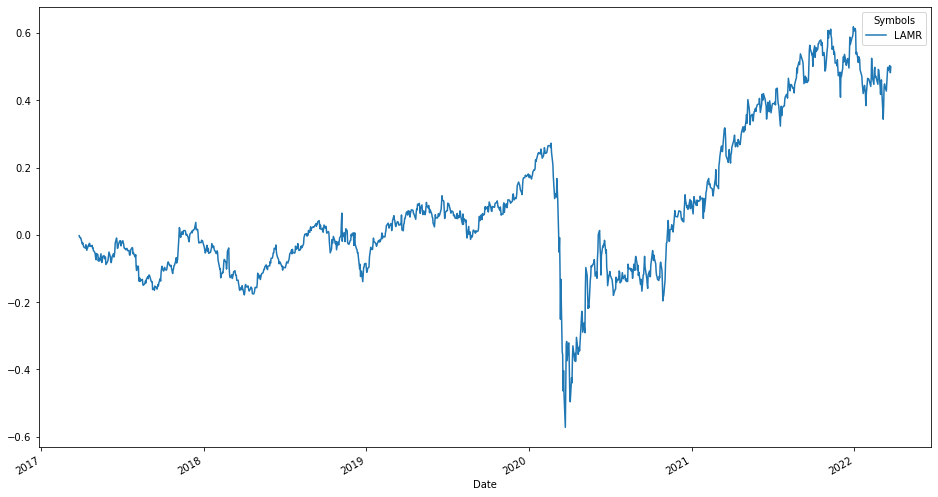

In [23]:
return_series_close.plot(figsize=(16,9))

In [24]:
highest = return_series_close[return_series_close.tail(1) > 5]

In [25]:
highest.dropna(axis=1, how="all")

Symbols
Date
2017-03-24
2017-03-27
2017-03-28
2017-03-29
2017-03-30
...
2022-03-18
2022-03-21
2022-03-22


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

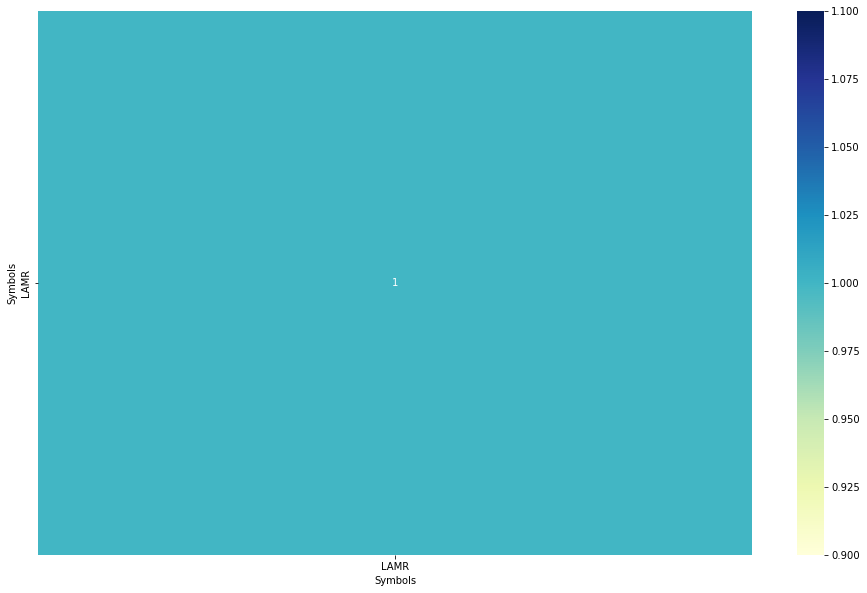

In [26]:
correlation = return_series_close.corr()
# correlation
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [27]:
correlation = correlation[correlation < 0.4]
correlation

Symbols,LAMR
Symbols,
LAMR,NaN


## Final DF

In [28]:
all_stocks = []
for each in correlation:
    all_stocks.append(each)

In [29]:
indexes = []
for i in range(len(df2_real_estate)):
    each = df2_real_estate.iloc[i]
    ticker = each["ticker"]
    if ticker in all_stocks:
        indexes.append(i)

In [30]:
chosen_realestate_df = df2_real_estate.iloc[indexes]
chosen_realestate_df #6 stocks for the real estate sector

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
581,LAMR,Lamar Advertising Company,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,109.85,0.167806,1.112110e+10,...,3.689,0.03,23.422174,29.777718,20.371571,16.28,0.194245,0.41355,0.128521,0.457


In [31]:
chosen_realestate_df.to_csv("selected_stocks_realestate.csv")

# Financial Sector

## Filtering Stocks based on Sharpe Ratio

In [36]:
sharpe_list = []
for i in range(len(df_financial)):
    each = df_financial.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [37]:
sharpe_list

[0.657,
 0.03,
 0.246,
 0.432,
 0.138,
 0.287,
 0.466,
 0.369,
 0.335,
 0.318,
 0.487,
 0.545,
 0.272,
 0.375,
 0.703,
 0.16,
 0.06,
 0.13,
 0.234,
 0.332,
 0.114,
 0.087,
 0.853,
 -0.06,
 0.466,
 0.267,
 0.435,
 0.052,
 0.395,
 0.174,
 0.312,
 0.323,
 0.767,
 -0.032,
 -0.478,
 0.955,
 0.031,
 0.156,
 0.147,
 0.325,
 0.29,
 0.06,
 0.261,
 0.588,
 0.163,
 0.479,
 0.013,
 0.193,
 0.24,
 -0.118,
 0.261,
 0.998,
 0.377,
 0.38,
 0.302,
 0.485,
 0.238,
 0.534,
 0.894,
 0.23,
 0.348,
 1.018,
 0.356,
 0.724,
 0.296,
 0.199,
 0.281,
 0.305]

In [38]:
df_financial["sharpe"] = sharpe_list
df_financial

C:\Users\LAVANY~1\AppData\Local\Temp/ipykernel_4624/3496381630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_financial["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
26,AXP,American Express Company,Financial Services,Increase,Below Fair Price,UnderValued,Not Sustainable,195.1100,0.155990,1.511236e+11,...,9.573,0.4330,20.176836,20.381280,706.617956,20.34,0.169933,0.343000,0.210121,0.657
28,BEN,"Franklin Resources, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,29.9300,0.009948,1.501872e+10,...,3.570,0.0949,7.876316,8.383754,9.619805,19.51,0.165071,0.345803,-0.016066,0.030
31,BK,The Bank of New York Mellon Cor,Financial Services,Increase,Above Fair Price,UnderValued,Average,55.7400,0.123563,4.603126e+10,...,3.925,0.1356,12.196937,14.201275,24.881978,22.79,0.158993,0.298729,0.053724,0.246
51,COF,Capital One Financial Corporati,Financial Services,Decrease,Below Fair Price,UnderValued,Average,153.6800,0.140197,6.540959e+10,...,26.739,0.4520,7.958571,5.747410,626.622996,23.22,0.219773,0.398322,0.129511,0.432
111,IVZ,Invesco Ltd,Financial Services,Increase,Above Fair Price,UnderValued,Not Sustainable,22.0725,0.030092,1.017999e+10,...,2.530,0.2130,7.911291,8.724308,17.835618,20.28,0.168718,0.427328,-0.024774,0.138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,VCTR,"Victory Capital Holdings, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,No Data,32.2100,0.110286,2.193565e+09,...,3.551,0.1170,6.100378,9.070683,12.392493,999.00,0.150484,NaN,NaN,0.724
915,VLY,Valley National Bancorp,Financial Services,Increase,Above Fair Price,UnderValued,No Data,13.9850,0.063284,5.691251e+09,...,1.110,0.0500,11.654166,12.599098,3.083582,999.00,0.166287,0.360308,0.060302,0.296
922,WAFD,"Washington Federal, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,No Data,35.9200,0.109876,2.342835e+09,...,2.390,0.0700,11.777049,15.029287,9.385982,999.00,0.122525,0.323025,0.026584,0.199
932,XP,XP Inc.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,34.1100,-0.001020,1.908622e+10,...,0.986,0.0478,27.508064,34.594322,7.380346,999.00,0.251378,NaN,NaN,0.281


In [39]:
df2_financial = df_financial[df_financial["sharpe"] > 0.3]
df2_financial

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
26,AXP,American Express Company,Financial Services,Increase,Below Fair Price,UnderValued,Not Sustainable,195.110,0.155990,1.511236e+11,...,9.573,0.4330,20.176836,20.381280,706.617956,20.34,0.169933,0.343000,0.210121,0.657
51,COF,Capital One Financial Corporati,Financial Services,Decrease,Below Fair Price,UnderValued,Average,153.680,0.140197,6.540959e+10,...,26.739,0.4520,7.958571,5.747410,626.622996,23.22,0.219773,0.398322,0.129511,0.432
136,MET,"MetLife, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,69.590,0.109501,5.853632e+10,...,5.992,0.0835,9.665278,11.613817,20.356189,14.74,0.172365,0.338744,0.114839,0.466
156,NTRS,Northern Trust Corporation,Financial Services,Increase,Above Fair Price,UnderValued,Average,118.050,0.129134,2.451438e+10,...,6.340,0.1866,15.553360,18.619873,78.251831,24.39,0.160209,0.317205,0.083843,0.369
162,PBCT,People's,Financial Services,Increase,Above Fair Price,UnderValued,Average,21.010,0.099441,8.992805e+09,...,0.702,0.1074,19.275229,29.928774,7.479217,23.64,0.139544,0.359543,0.052798,0.335
165,PFG,Principal Financial Group Inc,Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,71.680,0.134755,1.900015e+10,...,6.220,0.1647,10.240000,11.524116,40.180390,17.00,0.213695,0.368267,0.065865,0.318
169,PNC,"PNC Financial Services Group, I",Financial Services,Increase,Above Fair Price,UnderValued,Average,204.410,0.161210,8.639205e+10,...,10.173,-0.0426,14.497163,20.093384,19.635067,22.64,0.182089,0.324564,0.131015,0.487
185,SBNY,Signature Bank,Financial Services,Increase,Above Fair Price,UnderValued,Average,337.790,0.196788,2.048102e+10,...,13.954,0.0632,19.570684,24.207396,83.343349,28.14,0.248947,0.404451,0.169671,0.545
193,TFC,Truist Financial Corporation,Financial Services,Increase,Above Fair Price,UnderValued,No Data,62.230,0.110499,8.307021e+10,...,4.238,0.0460,12.804526,14.683813,13.257890,999.00,0.173580,0.360569,0.086008,0.375
197,TROW,"T. Rowe Price Group, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,142.560,0.120724,3.267447e+10,...,13.270,0.1220,10.678651,10.743029,57.098253,16.74,0.167502,0.300412,0.193441,0.703


## Correlation between Stocks

In [40]:
returns_list = []
for i in range(len(df2_financial)):
    each = df2_financial.iloc[i]
    ticker = each["ticker"]
    returns = get_return_series(ticker)
    if (len(returns) == 1260):
        returns_list.append(returns)

In [41]:
returns_list

[Symbols          AXP
 Date                
 2017-03-24       NaN
 2017-03-27 -0.007673
 2017-03-28  0.005627
 2017-03-29  0.000639
 2017-03-30  0.012916
 ...              ...
 2022-03-18  1.438875
 2022-03-21  1.418031
 2022-03-22  1.446675
 2022-03-23  1.378773
 2022-03-24  1.415473
 
 [1260 rows x 1 columns],
 Symbols          COF
 Date                
 2017-03-24       NaN
 2017-03-27 -0.019928
 2017-03-28  0.004415
 2017-03-29  0.010501
 2017-03-30  0.039857
 ...              ...
 2022-03-18  0.649284
 2022-03-21  0.604296
 2022-03-22  0.648807
 2022-03-23  0.598926
 2022-03-24  0.611814
 
 [1260 rows x 1 columns],
 Symbols          MET
 Date                
 2017-03-24       NaN
 2017-03-27 -0.006153
 2017-03-28  0.009037
 2017-03-29  0.003269
 2017-03-30  0.021342
 ...              ...
 2022-03-18  0.476656
 2022-03-21  0.483560
 2022-03-22  0.516997
 2022-03-23  0.497582
 2022-03-24  0.514193
 
 [1260 rows x 1 columns],
 Symbols         NTRS
 Date                
 2017-03-24   

In [42]:
return_series_close = pd.concat(returns_list, axis=1)
return_series_close

Symbols,AXP,COF,MET,NTRS,PBCT,PFG,PNC,SBNY,TFC,TROW,...,NMIH,PMTS,PNNT,PRAA,SAMG,SNEX,TBBK,TSC,VBTX,ESNT
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-27,-0.007673,-0.019928,-0.006153,-0.007930,-0.010532,-0.000965,-0.010050,-0.008567,-0.005404,-0.002949,...,0.013575,-0.011494,0.001284,0.001520,-0.011111,0.002212,0.020408,-0.002179,-0.010623,-0.002285
2017-03-28,0.005627,0.004415,0.009037,0.005131,0.002772,0.013511,0.007286,0.004491,0.011034,0.008256,...,0.004525,-0.011494,0.016688,-0.010638,-0.033333,0.010785,0.016327,-0.006536,0.010977,0.021708
2017-03-29,0.000639,0.010501,0.003269,0.004315,0.000554,0.004826,-0.000503,0.009258,0.001351,0.001327,...,-0.009050,-0.022989,0.035943,-0.016717,-0.014815,0.013274,0.006122,0.004357,-0.010977,0.014282
2017-03-30,0.012916,0.039857,0.021342,0.016793,0.020510,0.015120,0.017839,0.035374,0.018464,0.005602,...,0.018100,-0.045977,0.041078,0.004559,-0.011111,0.041482,0.040816,0.026144,0.004603,0.028563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-18,1.438875,0.649284,0.476656,0.343557,0.168514,0.126428,0.616164,1.160080,0.318622,1.163497,...,0.900452,-0.263448,-0.029525,0.379635,0.459259,1.092091,5.032653,0.395643,0.446884,0.189660
2022-03-21,1.418031,0.604296,0.483560,0.335394,0.180155,0.123371,0.616499,1.147851,0.319973,1.147575,...,0.917647,-0.250575,-0.015404,0.380851,0.480741,1.111726,4.981632,0.400436,0.408286,0.186233
2022-03-22,1.446675,0.648807,0.516997,0.366997,0.203437,0.141708,0.653015,1.219013,0.344517,1.203155,...,0.940272,-0.218391,-0.001284,0.367781,0.613333,1.129425,5.177551,0.417865,0.426346,0.204513


<AxesSubplot:xlabel='Date'>

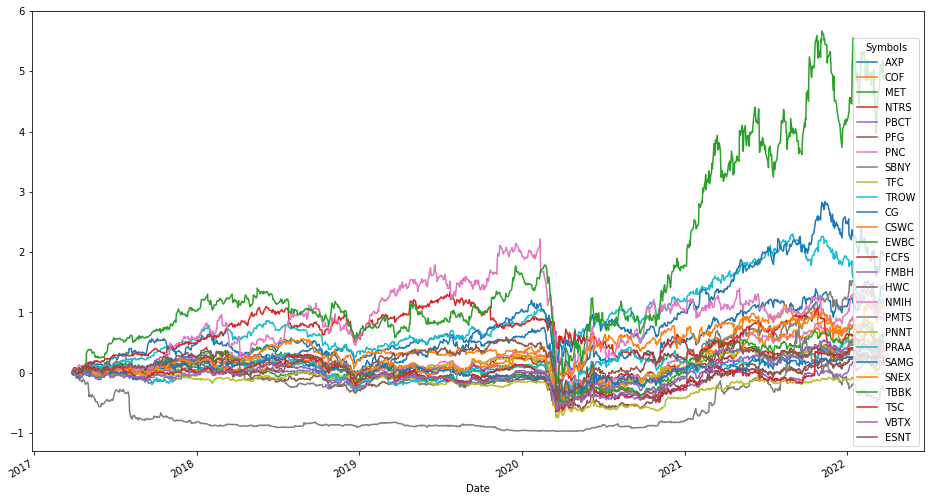

In [43]:
return_series_close.plot(figsize=(16,9))

In [44]:
highest = return_series_close[return_series_close.tail(1) > 5]

In [45]:
highest.dropna(axis=1, how="all")

Symbols
Date
2017-03-24
2017-03-27
2017-03-28
2017-03-29
2017-03-30
...
2022-03-18
2022-03-21
2022-03-22


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

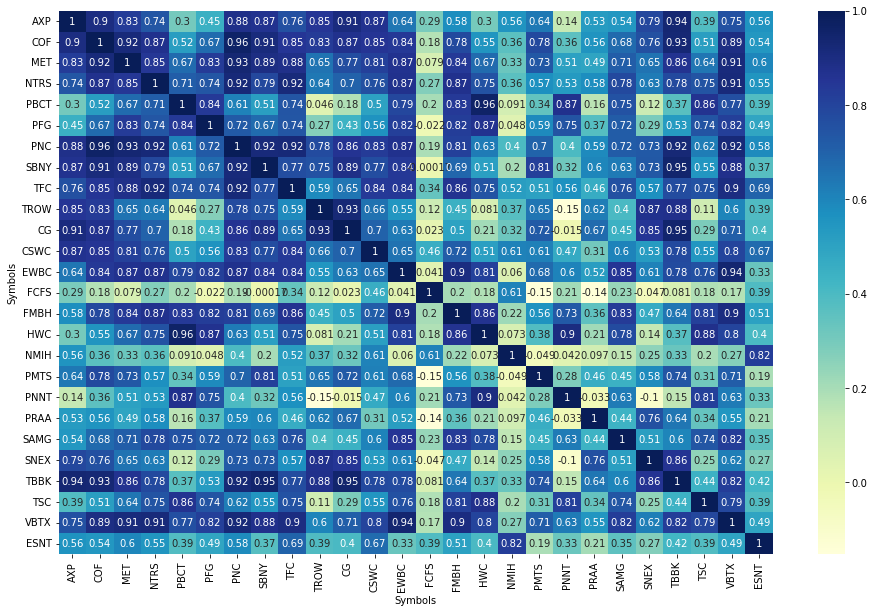

In [46]:
correlation = return_series_close.corr()
# correlation
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [47]:
correlation = correlation[correlation < 0.4]
correlation

Symbols,AXP,COF,MET,NTRS,PBCT,PFG,PNC,SBNY,TFC,TROW,...,NMIH,PMTS,PNNT,PRAA,SAMG,SNEX,TBBK,TSC,VBTX,ESNT
Symbols,,,,,,,,,,,,,,,,,,,,,
AXP,NaN,NaN,NaN,NaN,0.303580,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.140232,NaN,NaN,NaN,NaN,0.386372,NaN,NaN
COF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.362543,NaN,0.359392,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.328469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NTRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.363923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PBCT,0.303580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045705,...,0.091334,0.343153,NaN,0.160696,NaN,0.122141,0.367885,NaN,NaN,0.385632
PFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.269159,...,0.048346,NaN,NaN,0.374364,NaN,0.291507,NaN,NaN,NaN,NaN
PNC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.399925,NaN,0.399081,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SBNY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.200958,NaN,0.319490,NaN,NaN,NaN,NaN,NaN,NaN,0.369960
TFC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Final DF for Financial

In [48]:
all_stocks = []
for each in correlation:
    all_stocks.append(each)

In [49]:
indexes = []
for i in range(len(df2_financial)):
    each = df2_financial.iloc[i]
    ticker = each["ticker"]
    if ticker in all_stocks:
        indexes.append(i)

In [50]:
chosen_financial_df = df2_financial.iloc[indexes]
chosen_financial_df #23 stocks for financial sector

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
26,AXP,American Express Company,Financial Services,Increase,Below Fair Price,UnderValued,Not Sustainable,195.11,0.155990,1.511236e+11,...,9.573,0.4330,20.176836,20.381280,706.617956,20.34,0.169933,0.343000,0.210121,0.657
51,COF,Capital One Financial Corporati,Financial Services,Decrease,Below Fair Price,UnderValued,Average,153.68,0.140197,6.540959e+10,...,26.739,0.4520,7.958571,5.747410,626.622996,23.22,0.219773,0.398322,0.129511,0.432
136,MET,"MetLife, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,69.59,0.109501,5.853632e+10,...,5.992,0.0835,9.665278,11.613817,20.356189,14.74,0.172365,0.338744,0.114839,0.466
156,NTRS,Northern Trust Corporation,Financial Services,Increase,Above Fair Price,UnderValued,Average,118.05,0.129134,2.451438e+10,...,6.340,0.1866,15.553360,18.619873,78.251831,24.39,0.160209,0.317205,0.083843,0.369
162,PBCT,People's,Financial Services,Increase,Above Fair Price,UnderValued,Average,21.01,0.099441,8.992805e+09,...,0.702,0.1074,19.275229,29.928774,7.479217,23.64,0.139544,0.359543,0.052798,0.335
165,PFG,Principal Financial Group Inc,Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,71.68,0.134755,1.900015e+10,...,6.220,0.1647,10.240000,11.524116,40.180390,17.00,0.213695,0.368267,0.065865,0.318
169,PNC,"PNC Financial Services Group, I",Financial Services,Increase,Above Fair Price,UnderValued,Average,204.41,0.161210,8.639205e+10,...,10.173,-0.0426,14.497163,20.093384,19.635067,22.64,0.182089,0.324564,0.131015,0.487
185,SBNY,Signature Bank,Financial Services,Increase,Above Fair Price,UnderValued,Average,337.79,0.196788,2.048102e+10,...,13.954,0.0632,19.570684,24.207396,83.343349,28.14,0.248947,0.404451,0.169671,0.545
193,TFC,Truist Financial Corporation,Financial Services,Increase,Above Fair Price,UnderValued,No Data,62.23,0.110499,8.307021e+10,...,4.238,0.0460,12.804526,14.683813,13.257890,999.00,0.173580,0.360569,0.086008,0.375
197,TROW,"T. Rowe Price Group, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,142.56,0.120724,3.267447e+10,...,13.270,0.1220,10.678651,10.743029,57.098253,16.74,0.167502,0.300412,0.193441,0.703


In [51]:
chosen_financial_df.to_csv("selected_stocks_financial.csv")

# Consumer Defensive Sector

## Filtering Stocks based on Sharpe Ratio

In [52]:
sharpe_list = []
for i in range(len(df_consumer_d)):
    each = df_consumer_d.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [53]:
sharpe_list

[0.021,
 0.122,
 0.043,
 -0.338,
 0.44,
 0.341,
 1.081,
 0.202,
 0.29,
 0.058,
 0.124,
 0.314,
 0.292,
 0.032,
 0.759,
 0.311,
 0.204,
 0.1,
 0.275]

In [54]:
df_consumer_d["sharpe"] = sharpe_list
df_consumer_d

C:\Users\LAVANY~1\AppData\Local\Temp/ipykernel_4624/1180290169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_consumer_d["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
36,CAG,"ConAgra Brands, Inc.",Consumer Defensive,Increase,Above Fair Price,UnderValued,Not Sustainable,35.7000,0.090652,1.712493e+10,...,2.481,0.0224,13.522727,14.389359,6.193629,32.92,0.115232,0.287178,0.000833,0.021
46,CL,Colgate-Palmolive Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,Average,79.0900,0.078620,6.666093e+10,...,3.140,0.0612,23.330381,25.187897,19.186076,22.12,0.094567,0.206239,0.051918,0.122
117,K,Kellogg Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,Average,66.3900,0.056187,2.264716e+10,...,3.668,0.0315,15.959135,18.099781,12.474271,26.78,0.090920,0.233473,0.006971,0.043
119,KHC,The Kraft Heinz Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,Not Sustainable,39.7900,-0.035146,4.870455e+10,...,1.858,-0.0244,15.071969,21.415500,4.528032,34.47,0.150484,0.322340,-0.118555,-0.338
191,SYY,Sysco Corporation,Consumer Defensive,Increase,Below Fair Price,UnderValued,Sustainable,84.0500,0.143456,4.308874e+10,...,1.332,0.5309,19.964370,63.100600,551.757903,12.14,0.182089,0.361481,0.130098,0.440
306,CCEP,Coca-Cola Europacific Partners,Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,54.0900,0.128504,2.491753e+10,...,1.515,0.3135,20.258427,35.702972,89.469938,999.00,0.109154,0.295493,0.110419,0.341
312,CELH,"Celsius Holdings, Inc.",Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,55.8575,0.717423,4.178984e+09,...,0.110,0.6720,146.993420,507.795440,810.769459,999.00,0.262318,0.729476,0.799096,1.081
388,DTEA,DAVIDsTEA Inc.,Consumer Defensive,Increase,Above Fair Price,UnderValued,No Data,3.0500,-0.195930,8.039800e+07,...,1.431,-1.3172,-101.666664,2.131377,-0.000014,999.00,0.421561,0.875885,-0.151658,0.202
438,FIZZ,National Beverage Corp.,Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,42.3300,0.219583,3.950329e+09,...,1.800,0.2556,22.162306,23.516668,46.665884,999.00,0.135897,0.463844,0.137329,0.290
500,HAIN,"The Hain Celestial Group, Inc.",Consumer Defensive,Increase,Above Fair Price,UnderValued,No Data,36.0000,0.058080,3.343734e+09,...,0.962,0.1300,19.459460,37.422035,15.370851,999.00,0.099429,0.344834,-0.020295,0.058


In [55]:
df2_consumer_d = df_consumer_d[df_consumer_d["sharpe"] > 0.3]
df2_consumer_d

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
191,SYY,Sysco Corporation,Consumer Defensive,Increase,Below Fair Price,UnderValued,Sustainable,84.0500,0.143456,4.308874e+10,...,1.332,0.5309,19.964370,63.100600,551.757903,12.14,0.182089,0.361481,0.130098,0.440
306,CCEP,Coca-Cola Europacific Partners,Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,54.0900,0.128504,2.491753e+10,...,1.515,0.3135,20.258427,35.702972,89.469938,999.00,0.109154,0.295493,0.110419,0.341
312,CELH,"Celsius Holdings, Inc.",Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,55.8575,0.717423,4.178984e+09,...,0.110,0.6720,146.993420,507.795440,810.769459,999.00,0.262318,0.729476,0.799096,1.081
609,LOPE,"Grand Canyon Education, Inc.",Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,86.2900,0.170795,3.457951e+09,...,5.729,0.9000,13.588977,15.061965,3957.603724,999.00,0.075117,0.335656,0.079754,0.314
835,SMPL,The Simply Good Foods Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,No Data,38.1200,0.121790,3.660747e+09,...,0.420,0.0918,24.593548,90.761900,11.943459,999.00,0.148053,NaN,NaN,0.759
844,SPTN,SpartanNash Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,No Data,27.0800,0.069797,9.733743e+08,...,1.780,-0.0879,14.104167,15.213484,1.681590,999.00,0.109154,0.525851,-0.036807,0.311


## Correlation between Stocks

In [56]:
returns_list = []
for i in range(len(df2_consumer_d)):
    each = df2_consumer_d.iloc[i]
    ticker = each["ticker"]
    returns = get_return_series(ticker)
    if (len(returns) == 1260):
        returns_list.append(returns)

In [57]:
returns_list

[Symbols          SYY
 Date                
 2017-03-24       NaN
 2017-03-27 -0.014581
 2017-03-28 -0.011551
 2017-03-29 -0.018936
 2017-03-30 -0.014959
 ...              ...
 2022-03-18  0.538345
 2022-03-21  0.529066
 2022-03-22  0.535883
 2022-03-23  0.523007
 2022-03-24  0.543836
 
 [1260 rows x 1 columns],
 Symbols         CCEP
 Date                
 2017-03-24       NaN
 2017-03-27  0.002388
 2017-03-28  0.006102
 2017-03-29 -0.001061
 2017-03-30  0.000265
 ...              ...
 2022-03-18  0.318918
 2022-03-21  0.315734
 2022-03-22  0.318918
 2022-03-23  0.275935
 2022-03-24  0.288140
 
 [1260 rows x 1 columns],
 Symbols             CELH
 Date                    
 2017-03-24           NaN
 2017-03-27  4.278077e-02
 2017-03-28 -1.110223e-16
 2017-03-29 -3.743318e-02
 2017-03-30 -2.673794e-03
 ...                  ...
 2022-03-18  1.535829e+01
 2022-03-21  1.497861e+01
 2022-03-22  1.458824e+01
 2022-03-23  1.448128e+01
 2022-03-24  1.416310e+01
 
 [1260 rows x 1 columns],
 Symbo

In [58]:
return_series_close = pd.concat(returns_list, axis=1)
return_series_close

Symbols,SYY,CCEP,CELH,LOPE,SPTN
Date,,,,,
2017-03-24,NaN,NaN,NaN,NaN,NaN
2017-03-27,-0.014581,0.002388,4.278077e-02,0.009457,0.001777
2017-03-28,-0.011551,0.006102,-1.110223e-16,0.021679,0.007109
2017-03-29,-0.018936,-0.001061,-3.743318e-02,0.029245,0.019846
2017-03-30,-0.014959,0.000265,-2.673794e-03,0.043794,0.041173
...,...,...,...,...,...
2022-03-18,0.538345,0.318918,1.535829e+01,0.420631,0.029325
2022-03-21,0.529066,0.315734,1.497861e+01,0.416121,0.026659
2022-03-22,0.535883,0.318918,1.458824e+01,0.394151,0.024882


<AxesSubplot:xlabel='Date'>

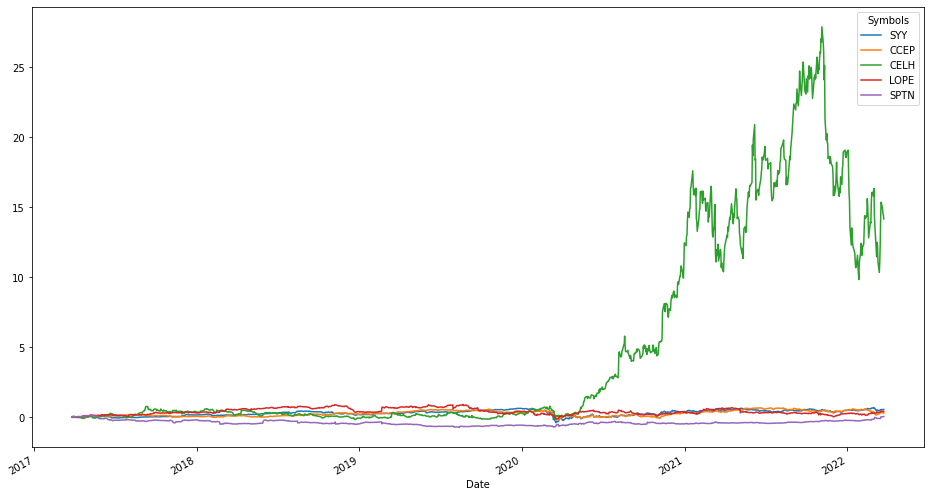

In [59]:
return_series_close.plot(figsize=(16,9))

In [60]:
highest = return_series_close[return_series_close.tail(1) > 5]

In [61]:
highest.dropna(axis=1, how="all")

Symbols,CELH
Date,
2017-03-24,NaN
2017-03-27,NaN
2017-03-28,NaN
2017-03-29,NaN
2017-03-30,NaN
...,...
2022-03-18,NaN
2022-03-21,NaN
2022-03-22,NaN


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

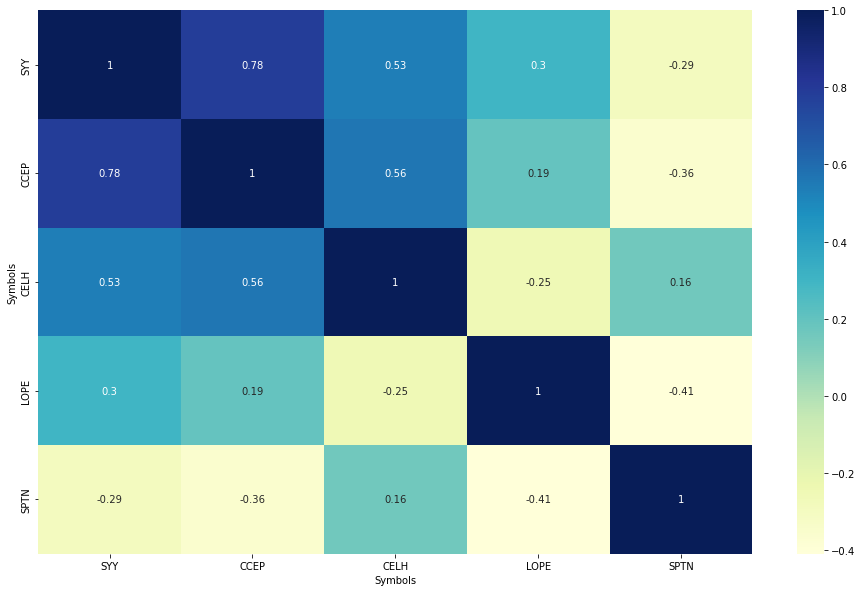

In [62]:
correlation = return_series_close.corr()
# correlation
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [63]:
correlation = correlation[correlation < 0.4]
correlation

Symbols,SYY,CCEP,CELH,LOPE,SPTN
Symbols,,,,,
SYY,NaN,NaN,NaN,0.300057,-0.291973
CCEP,NaN,NaN,NaN,0.191445,-0.359783
CELH,NaN,NaN,NaN,-0.254407,0.161265
LOPE,0.300057,0.191445,-0.254407,NaN,-0.409453
SPTN,-0.291973,-0.359783,0.161265,-0.409453,NaN


## Final DF for Consumer Defensive

In [64]:
all_stocks = []
for each in correlation:
    all_stocks.append(each)

In [65]:
indexes = []
for i in range(len(df2_consumer_d)):
    each = df2_consumer_d.iloc[i]
    ticker = each["ticker"]
    if ticker in all_stocks:
        indexes.append(i)

In [66]:
chosen_consumer_d_df = df2_consumer_d.iloc[indexes]
chosen_consumer_d_df #4 stocks for consumer defensive sector

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
191,SYY,Sysco Corporation,Consumer Defensive,Increase,Below Fair Price,UnderValued,Sustainable,84.0500,0.143456,4.308874e+10,...,1.332,0.5309,19.964370,63.100600,551.757903,12.14,0.182089,0.361481,0.130098,0.440
306,CCEP,Coca-Cola Europacific Partners,Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,54.0900,0.128504,2.491753e+10,...,1.515,0.3135,20.258427,35.702972,89.469938,999.00,0.109154,0.295493,0.110419,0.341
312,CELH,"Celsius Holdings, Inc.",Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,55.8575,0.717423,4.178984e+09,...,0.110,0.6720,146.993420,507.795440,810.769459,999.00,0.262318,0.729476,0.799096,1.081
609,LOPE,"Grand Canyon Education, Inc.",Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,86.2900,0.170795,3.457951e+09,...,5.729,0.9000,13.588977,15.061965,3957.603724,999.00,0.075117,0.335656,0.079754,0.314
844,SPTN,SpartanNash Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,No Data,27.0800,0.069797,9.733743e+08,...,1.780,-0.0879,14.104167,15.213484,1.681590,999.00,0.109154,0.525851,-0.036807,0.311


In [67]:
chosen_consumer_d_df.to_csv("selected_stocks_consumer_d.csv")

# Industrials Sector

## Filtering Stocks based on Sharpe Ratio

In [68]:
sharpe_list = []
for i in range(len(df_industrials)):
    each = df_industrials.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [69]:
sharpe_list

[-0.015,
 0.396,
 0.763,
 0.736,
 0.375,
 0.4,
 0.488,
 0.255,
 0.339,
 0.619,
 0.333,
 0.733,
 0.751,
 0.491,
 0.73,
 -0.026,
 1.24,
 0.53,
 0.405,
 0.313,
 0.669,
 0.504,
 0.184,
 0.253,
 0.21,
 0.722,
 0.037,
 0.393,
 0.101,
 0.876,
 -0.016,
 0.469,
 0.175,
 -0.331,
 0.32,
 0.238,
 0.351,
 0.234,
 0.442,
 0.637,
 0.556,
 0.332,
 0.477,
 0.3,
 0.612,
 -0.002,
 0.751,
 0.531,
 0.353,
 0.215,
 0.683,
 -0.174,
 0.446,
 0.183,
 0.64,
 0.352,
 0.796,
 0.406,
 0.453,
 0.095,
 0.554,
 -0.169,
 0.026,
 0.739,
 0.26,
 0.269,
 0.419,
 0.557,
 0.604,
 0.407,
 0.433,
 0.239,
 0.62,
 0.678,
 0.484,
 0.239,
 0.588,
 0.212,
 0.521,
 1.076,
 0.636,
 0.213,
 0.121,
 -0.093,
 0.529,
 1.017,
 0.375,
 0.205,
 0.44,
 0.647,
 0.38,
 0.294,
 0.484]

In [70]:
df_industrials["sharpe"] = sharpe_list
df_industrials

C:\Users\LAVANY~1\AppData\Local\Temp/ipykernel_4624/77830193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_industrials["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
11,ALK,"Alaska Air Group, Inc.",Industrials,Increase,Above Fair Price,UnderValued,No Data,58.9750,0.141697,7.425660e+09,...,3.770,-0.2340,9.073076,15.643236,0.761055,999.00,0.207617,0.454054,-0.086043,-0.015
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004,0.396
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.2800,0.155568,2.967437e+10,...,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944,0.763
37,CAT,"Caterpillar, Inc.",Industrials,Increase,Below Fair Price,UnderValued,Not Sustainable,193.1600,0.084214,1.044884e+11,...,9.348,0.3224,17.721102,20.663244,339.525357,34.28,0.128603,0.314958,0.175801,0.736
45,CHRW,"C.H. Robinson Worldwide, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,92.0950,0.055239,1.197115e+10,...,5.646,0.1239,15.222314,16.311548,37.451959,19.83,0.111585,0.262005,0.071573,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,ULH,"Universal Logistics Holdings, I",Industrials,Increase,Above Fair Price,UnderValued,No Data,18.0900,0.030170,4.869738e+08,...,2.740,0.0300,5.566154,6.602190,3.354772,999.00,0.199108,0.403463,0.069257,0.440
908,USAK,"USA Truck, Inc.",Industrials,Increase,Below Fair Price,UnderValued,No Data,24.0400,0.108008,2.136505e+08,...,2.057,0.2760,9.246155,11.686924,30.639383,999.00,0.273259,0.638308,0.234642,0.647
918,VRRM,Verra Mobility Corporation,Industrials,Increase,Below Fair Price,UnderValued,No Data,17.2700,0.056159,2.695225e+09,...,0.058,0.3080,18.178947,297.758640,27.507524,999.00,0.196676,NaN,NaN,0.380
920,VSEC,VSE Corporation,Industrials,Increase,Above Fair Price,UnderValued,No Data,47.3300,0.148449,6.016543e+08,...,0.633,0.1960,12.198454,74.770935,33.682675,999.00,0.199108,0.472182,0.061138,0.294


In [71]:
df2_industrials = df_industrials[df_industrials["sharpe"] > 0.3]
df2_industrials

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004,0.396
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.2800,0.155568,2.967437e+10,...,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944,0.763
37,CAT,"Caterpillar, Inc.",Industrials,Increase,Below Fair Price,UnderValued,Not Sustainable,193.1600,0.084214,1.044884e+11,...,9.348,0.3224,17.721102,20.663244,339.525357,34.28,0.128603,0.314958,0.175801,0.736
45,CHRW,"C.H. Robinson Worldwide, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,92.0950,0.055239,1.197115e+10,...,5.646,0.1239,15.222314,16.311548,37.451959,19.83,0.111585,0.262005,0.071573,0.375
49,CMI,Cummins Inc.,Industrials,Increase,Above Fair Price,UnderValued,Sustainable,216.0600,0.086095,3.090349e+10,...,15.211,0.1852,11.832420,14.204194,141.706114,19.36,0.144406,0.279770,0.098462,0.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,TRS,TriMas Corporation,Industrials,Increase,Above Fair Price,UnderValued,No Data,32.0300,0.056277,1.372706e+09,...,1.581,0.0934,13.020325,20.259329,10.168526,999.00,0.103076,0.319927,0.074926,0.375
904,ULH,"Universal Logistics Holdings, I",Industrials,Increase,Above Fair Price,UnderValued,No Data,18.0900,0.030170,4.869738e+08,...,2.740,0.0300,5.566154,6.602190,3.354772,999.00,0.199108,0.403463,0.069257,0.440
908,USAK,"USA Truck, Inc.",Industrials,Increase,Below Fair Price,UnderValued,No Data,24.0400,0.108008,2.136505e+08,...,2.057,0.2760,9.246155,11.686924,30.639383,999.00,0.273259,0.638308,0.234642,0.647
918,VRRM,Verra Mobility Corporation,Industrials,Increase,Below Fair Price,UnderValued,No Data,17.2700,0.056159,2.695225e+09,...,0.058,0.3080,18.178947,297.758640,27.507524,999.00,0.196676,NaN,NaN,0.380


## Correlation between Stocks

In [72]:
returns_list = []
for i in range(len(df2_industrials)):
    each = df2_industrials.iloc[i]
    ticker = each["ticker"]
    returns = get_return_series(ticker)
    if (len(returns) == 1260):
        returns_list.append(returns)

In [73]:
returns_list

[Symbols         ALLE
 Date                
 2017-03-24       NaN
 2017-03-27 -0.002132
 2017-03-28  0.000933
 2017-03-29  0.004797
 2017-03-30  0.010793
 ...              ...
 2022-03-18  0.574150
 2022-03-21  0.562292
 2022-03-22  0.565223
 2022-03-23  0.508195
 2022-03-24  0.500200
 
 [1260 rows x 1 columns],
 Symbols          AME
 Date                
 2017-03-24       NaN
 2017-03-27  0.001498
 2017-03-28  0.009547
 2017-03-29  0.014414
 2017-03-30  0.013104
 ...              ...
 2022-03-18  1.522651
 2022-03-21  1.521340
 2022-03-22  1.520030
 2022-03-23  1.481281
 2022-03-24  1.480345
 
 [1260 rows x 1 columns],
 Symbols          CAT
 Date                
 2017-03-24       NaN
 2017-03-27 -0.006945
 2017-03-28  0.008681
 2017-03-29  0.007705
 2017-03-30  0.011611
 ...              ...
 2022-03-18  1.397287
 2022-03-21  1.427672
 2022-03-22  1.416820
 2022-03-23  1.410960
 2022-03-24  1.411394
 
 [1260 rows x 1 columns],
 Symbols         CHRW
 Date                
 2017-03-24   

In [74]:
return_series_close = pd.concat(returns_list, axis=1)
return_series_close

Symbols,ALLE,AME,CAT,CHRW,CMI,EFX,GD,GWW,HWM,J,...,ROLL,SAIA,SBLK,TITN,TRNS,TRS,ULH,USAK,VRRM,WWD
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-27,-0.002132,0.001498,-0.006945,-0.005809,-0.007362,-0.002795,-0.010826,-0.009018,-0.004498,-0.007944,...,-0.002387,0.000000,0.004965,0.018127,-0.001597,0.009662,-0.011765,0.012363,0.000,0.006144
2017-03-28,0.000933,0.009547,0.008681,0.000645,0.006102,0.002648,0.004906,-0.001419,0.013493,0.001108,...,0.011611,0.036300,0.162860,0.066465,-0.009585,0.004831,0.027451,0.024725,0.000,0.013637
2017-03-29,0.004797,0.014414,0.007705,-0.002323,0.006235,-0.001839,0.004106,-0.007431,-0.017991,0.018105,...,0.024742,0.031616,0.158888,0.171450,0.010383,0.007246,0.101961,0.013736,0.000,0.013337
2017-03-30,0.010793,0.013104,0.011611,0.002323,0.007893,0.004635,0.006719,-0.023671,-0.004498,0.022169,...,0.041888,0.039813,0.191658,0.111027,0.006390,0.009662,0.098039,0.004121,0.000,0.023977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-18,0.574150,1.522651,1.397287,0.354202,0.371294,0.773781,0.227762,1.095562,0.339205,1.608904,...,1.195334,5.838875,1.908640,1.351964,5.256390,0.600483,0.780392,2.126374,0.693,0.849543
2022-03-21,0.562292,1.521340,1.427672,0.359365,0.367314,0.749724,0.258906,1.113556,0.344828,1.584334,...,1.162887,5.584075,1.938431,1.517372,5.168530,0.599034,0.798431,2.115385,0.642,0.866027
2022-03-22,0.565223,1.520030,1.416820,0.369304,0.390661,0.762672,0.268291,1.098777,0.398801,1.554775,...,1.190233,5.716394,1.864946,1.586858,5.161342,0.577778,0.790588,2.155220,0.621,0.889555


<AxesSubplot:xlabel='Date'>

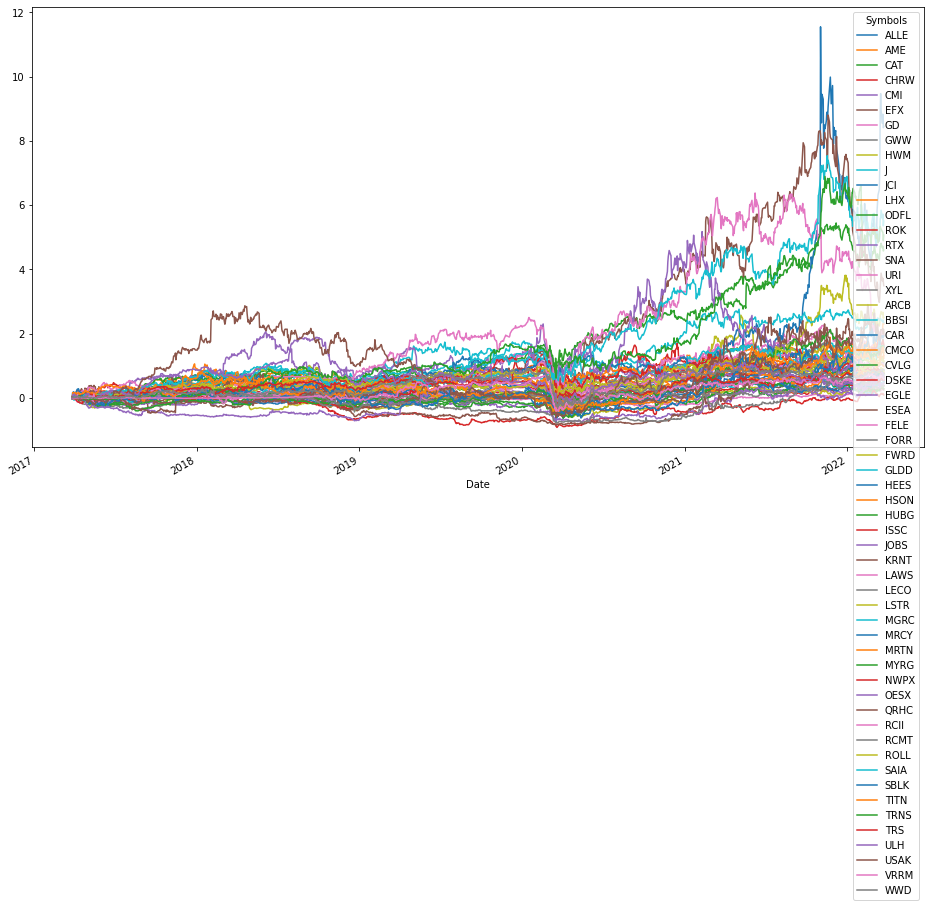

In [75]:
return_series_close.plot(figsize=(16,9))

In [76]:
highest = return_series_close[return_series_close.tail(1) > 5]

In [77]:
highest.dropna(axis=1, how="all")

Symbols,CAR,SAIA,TRNS
Date,,,
2017-03-24,NaN,NaN,NaN
2017-03-27,NaN,NaN,NaN
2017-03-28,NaN,NaN,NaN
2017-03-29,NaN,NaN,NaN
2017-03-30,NaN,NaN,NaN
...,...,...,...
2022-03-18,NaN,NaN,NaN
2022-03-21,NaN,NaN,NaN
2022-03-22,NaN,NaN,NaN


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

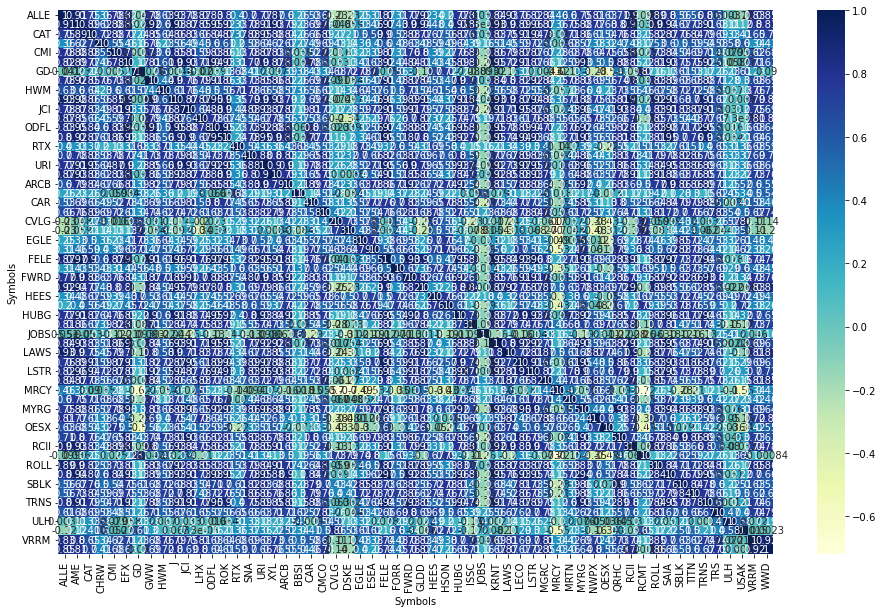

In [78]:
correlation = return_series_close.corr()
# correlation
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [79]:
correlation = correlation[correlation < 0.4]
correlation

Symbols,ALLE,AME,CAT,CHRW,CMI,EFX,GD,GWW,HWM,J,...,ROLL,SAIA,SBLK,TITN,TRNS,TRS,ULH,USAK,VRRM,WWD
Symbols,,,,,,,,,,,,,,,,,,,,,
ALLE,NaN,NaN,NaN,0.364733,NaN,NaN,-0.040509,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.003720,-0.117287,NaN,NaN
AME,NaN,NaN,NaN,NaN,NaN,NaN,0.022664,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.111530,0.115028,NaN,NaN
CAT,NaN,NaN,NaN,NaN,NaN,NaN,0.241764,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.330640,NaN,NaN,NaN
CHRW,0.364733,NaN,NaN,NaN,NaN,NaN,0.161091,NaN,0.226558,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.336852,NaN
CMI,NaN,NaN,NaN,NaN,NaN,NaN,0.005170,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.079043,0.051729,NaN,NaN
EFX,NaN,NaN,NaN,NaN,NaN,NaN,0.168402,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.057520,0.077144,NaN,NaN
GD,-0.040509,0.022664,0.241764,0.161091,0.005170,0.168402,NaN,0.021568,NaN,0.004621,...,0.159490,0.130223,NaN,NaN,0.174594,0.259969,0.232352,NaN,0.231247,0.090360
GWW,NaN,NaN,NaN,NaN,NaN,NaN,0.021568,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.281452,0.302828,NaN,NaN
HWM,NaN,NaN,NaN,0.226558,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.066586,0.128223,NaN,NaN


## Final DF for Industrials

In [80]:
all_stocks = []
for each in correlation:
    all_stocks.append(each)

In [81]:
indexes = []
for i in range(len(df2_industrials)):
    each = df2_industrials.iloc[i]
    ticker = each["ticker"]
    if ticker in all_stocks:
        indexes.append(i)

In [82]:
chosen_industrials_df = df2_industrials.iloc[indexes]
chosen_industrials_df #58 stocks for industrials sector

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004,0.396
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.2800,0.155568,2.967437e+10,...,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944,0.763
37,CAT,"Caterpillar, Inc.",Industrials,Increase,Below Fair Price,UnderValued,Not Sustainable,193.1600,0.084214,1.044884e+11,...,9.348,0.3224,17.721102,20.663244,339.525357,34.28,0.128603,0.314958,0.175801,0.736
45,CHRW,"C.H. Robinson Worldwide, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,92.0950,0.055239,1.197115e+10,...,5.646,0.1239,15.222314,16.311548,37.451959,19.83,0.111585,0.262005,0.071573,0.375
49,CMI,Cummins Inc.,Industrials,Increase,Above Fair Price,UnderValued,Sustainable,216.0600,0.086095,3.090349e+10,...,15.211,0.1852,11.832420,14.204194,141.706114,19.36,0.144406,0.279770,0.098462,0.400
72,EFX,"Equifax, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,210.8300,0.188171,2.572168e+10,...,5.654,0.1360,23.957954,37.288647,94.411925,25.71,0.193030,0.306472,0.136700,0.488
87,GD,General Dynamics Corporation,Industrials,Increase,Above Fair Price,UnderValued,Not Sustainable,219.7900,0.147892,6.137042e+10,...,11.652,0.0855,17.653814,18.862854,65.368086,34.88,0.150484,0.247011,0.059897,0.339
92,GWW,"W.W. Grainger, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,474.3200,0.106272,2.443697e+10,...,17.495,0.1538,20.304794,27.111746,244.306874,14.60,0.169933,0.317545,0.154030,0.619
100,HWM,Howmet Aerospace Inc.,Industrials,Increase,Below Fair Price,UnderValued,No Data,34.7950,0.063164,1.486505e+10,...,0.661,0.3355,24.853570,52.639935,66.834588,999.00,0.214910,0.460425,0.058968,0.333
112,J,Jacobs Engineering Group Inc.,Industrials,Increase,Above Fair Price,UnderValued,Average,120.3100,0.101926,1.557449e+10,...,3.196,0.1303,14.636252,37.643930,51.491402,25.36,0.118879,0.291333,0.161099,0.751


In [83]:
chosen_industrials_df.to_csv("selected_stocks_industrials.csv")

# Putting everything into 1 DF

In [84]:
final_df_income = pd.concat([df_utilites, chosen_realestate_df, chosen_financial_df, chosen_consumer_d_df, chosen_industrials_df])
final_df_income

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
78,ETR,Entergy Corporation,Utilities,Increase,Above Fair Price,UnderValued,Not Sustainable,105.055,0.092009,2.111406e+10,...,6.179,0.0600,16.570189,17.001942,25.226614,30.28,0.093351,0.260092,0.118782,NaN
581,LAMR,Lamar Advertising Company,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,109.850,0.167806,1.112110e+10,...,3.689,0.0300,23.422174,29.777718,20.371571,16.28,0.194245,0.413550,0.128521,0.457
26,AXP,American Express Company,Financial Services,Increase,Below Fair Price,UnderValued,Not Sustainable,195.110,0.155990,1.511236e+11,...,9.573,0.4330,20.176836,20.381280,706.617956,20.34,0.169933,0.343000,0.210121,0.657
51,COF,Capital One Financial Corporati,Financial Services,Decrease,Below Fair Price,UnderValued,Average,153.680,0.140197,6.540959e+10,...,26.739,0.4520,7.958571,5.747410,626.622996,23.22,0.219773,0.398322,0.129511,0.432
136,MET,"MetLife, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,69.590,0.109501,5.853632e+10,...,5.992,0.0835,9.665278,11.613817,20.356189,14.74,0.172365,0.338744,0.114839,0.466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,TRS,TriMas Corporation,Industrials,Increase,Above Fair Price,UnderValued,No Data,32.030,0.056277,1.372706e+09,...,1.581,0.0934,13.020325,20.259329,10.168526,999.00,0.103076,0.319927,0.074926,0.375
904,ULH,"Universal Logistics Holdings, I",Industrials,Increase,Above Fair Price,UnderValued,No Data,18.090,0.030170,4.869738e+08,...,2.740,0.0300,5.566154,6.602190,3.354772,999.00,0.199108,0.403463,0.069257,0.440
908,USAK,"USA Truck, Inc.",Industrials,Increase,Below Fair Price,UnderValued,No Data,24.040,0.108008,2.136505e+08,...,2.057,0.2760,9.246155,11.686924,30.639383,999.00,0.273259,0.638308,0.234642,0.647
918,VRRM,Verra Mobility Corporation,Industrials,Increase,Below Fair Price,UnderValued,No Data,17.270,0.056159,2.695225e+09,...,0.058,0.3080,18.178947,297.758640,27.507524,999.00,0.196676,NaN,NaN,0.380


In [85]:
final_df_income.to_csv("selected_stocks_income.csv")